# MASTER - Notebook 1
### Matteo Grazioso 884055

In [187]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')


In [188]:
# Disply all columns and all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [189]:
# The fileS contain the data of the validation of tickets in the city of public transport of Venice.

# Import the data into a dataframe of a txt file 
# path = 'data/raw/validazioni.txt'                     # Period: 2022-05-13 to 2022-07-15
path = 'data/raw/esportazioneCompleta.txt'            # Period: 2023-01-23 to 2023-03-14

df = pd.read_csv(path, header=0, sep='\t')
# Save the name of the file in a variable for future use extracting the name of the file from the path
file_name = path.split('/')[-1].split('.')[0]

In [190]:
# Check the first 5 rows of the data
df.head()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,13/01/2023 00:00,40834866809772548,162,Stazione MES,12101,Bigl.Aut.75'Mestre/Lido-tsc
1,13/01/2023 00:00,42242241686217732,3625,Aeroporto MA,12106,Bigl Aer-Venezia TSC
2,13/01/2023 00:00,42242241686217476,3625,Aeroporto MA,12106,Bigl Aer-Venezia TSC
3,13/01/2023 00:00,-3604990320,5049,"Zattere ""B""",23301,Mens.Studente Rete Unica
4,13/01/2023 00:00,-2824230951,5043,"S. Toma' ""B""",23303,Abb stud. ReteUnica 12 mesi


In [191]:
# Check the last 5 rows of the data
df.tail()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
5537461,14/03/2023 23:58,-2864643315,162,Stazione MES,11209,Bigl RETE UNICA 75'
5537462,14/03/2023 23:58,-2854956628,5026,Tronchetto F,11209,Bigl RETE UNICA 75'
5537463,14/03/2023 23:59,-2850025054,384,Mestre Centr,23101,Mensile ordinario Rete Unica
5537464,14/03/2023 23:59,-2824225710,5024,"Tronchetto """,23101,Mensile ordinario Rete Unica
5537465,14/03/2023 23:59,-3604916033,5039,"Rialto ""C""",23101,Mensile ordinario Rete Unica


In [192]:
# Create a subset of the data with the first 10% of the rows and the last 10% of the rows
df = df.iloc[:int(len(df)*0.1),:]
df = df.append(df.iloc[-int(len(df)*0.1):,:])


## Explorative Data Analysis


In [193]:
# Dates and hour of the validation of the ticket are in the same column 'DATA_VALIDAZIONE'
# Split the column 'DATA_VALIDAZIONE' into two columns 'DATA' and 'ORA' and convert them to datetime format
df.insert(0, 'DATA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[0], format='%d/%m/%Y'))
df.insert(1, 'ORA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[1], format='%H:%M').dt.time)

# Drop the column 'DATA_VALIDAZIONE'
# df.drop('DATA_VALIDAZIONE', axis=1, inplace=True)

# Display the first 5 rows of the dataframe
df.head()

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,2023-01-13,00:00:00,13/01/2023 00:00,40834866809772548,162,Stazione MES,12101,Bigl.Aut.75'Mestre/Lido-tsc
1,2023-01-13,00:00:00,13/01/2023 00:00,42242241686217732,3625,Aeroporto MA,12106,Bigl Aer-Venezia TSC
2,2023-01-13,00:00:00,13/01/2023 00:00,42242241686217476,3625,Aeroporto MA,12106,Bigl Aer-Venezia TSC
3,2023-01-13,00:00:00,13/01/2023 00:00,-3604990320,5049,"Zattere ""B""",23301,Mens.Studente Rete Unica
4,2023-01-13,00:00:00,13/01/2023 00:00,-2824230951,5043,"S. Toma' ""B""",23303,Abb stud. ReteUnica 12 mesi


In [194]:
# Set the format of the timestamp
df['DATA_VALIDAZIONE'] = pd.to_datetime(df['DATA_VALIDAZIONE'], format='%d/%m/%Y %H:%M')

In [195]:
# Print the date of the first and last validation using both data and hour
print('First validation: ', df['DATA'].min(), df['ORA'].min())
print('Last validation: ', df['DATA'].max(), df['ORA'].max())

# Print the number of Serial numbers
print('Number of Serial numbers: ', df['SERIALE'].nunique())

# Print the number of validation (rows)
print('Number of validation: ', df.shape[0])

# Print the number of tickets
print('Number of tickets: ', df['DESCRIZIONE_TITOLO'].nunique())
# Print the number of titolo
print('Number of titolo: ', df['TITOLO'].nunique())
# TODO: why the number of unique TITOLO is different from the number of DESCRIZIONE_TITOLO?

# Print the number of FERMATA
print('Number of FERMATA: ', df['FERMATA'].nunique())
# Print the number of DESCRIZIONE
print('Number of DESCRIZIONE: ', df['DESCRIZIONE'].nunique())
# TODO: why the number of unique DESCRIZIONE is different from the number of FERMATA?

First validation:  2023-01-13 00:00:00 00:00:00
Last validation:  2023-01-20 00:00:00 23:59:00
Number of Serial numbers:  192861
Number of validation:  609120
Number of tickets:  272
Number of titolo:  273
Number of FERMATA:  1424
Number of DESCRIZIONE:  819


In [196]:
# Which is the most used ticket?
df['DESCRIZIONE_TITOLO'].value_counts().head(10)

Bigl RETE UNICA 75'             147075
Mensile ordinario Rete Unica     99541
DailyP-Tpl19,90-C.Ve5,10         43866
Annuale ordinario Rete Unica     43061
75'-Tpl 8,64-ComVe0,86           40709
Bigl.Aut.75'Mestre/Lido-tsc      32776
48h-Tpl 29,90-ComVe5,10          21459
Mens.Studente Rete Unica         15544
72h-Tpl 38,40-ComVe6,60          12514
Mensile ORDINARIO ISOLE          11554
Name: DESCRIZIONE_TITOLO, dtype: int64

In [197]:
# Which is the most frequent validation in date and hour?
# Date and hour are in two different columns; DATA_VALIDAZIONE does not exist anymore
df.groupby(['DATA', 'ORA'])['SERIALE'].count().sort_values(ascending=False).head(10)
# TODO: #4 Re-aswer the question of the most frequent validation after cleaning operations

DATA        ORA     
2023-01-20  13:09:00    316
            14:49:00    302
            14:21:00    286
            16:13:00    282
            14:46:00    278
            13:18:00    276
            11:24:00    274
            10:16:00    272
            16:02:00    270
            16:40:00    270
Name: SERIALE, dtype: int64

In [198]:
# Which is the most frequent FERMATA?
df['DESCRIZIONE'].value_counts().head(10)
# TODO: #4 Re-aswer the question of the most frequent FERMATA after cleaning operations

P.le Roma "G    43323
Rialto "C"      41714
Lido S.M.E.     38107
San Marco-Sa    28267
VENEZIA         25413
P.le Roma "E    20646
S. Marco-San    18916
Ferrovia "B"    18768
Burano "C"      17463
Giudecca Pal    16826
Name: DESCRIZIONE, dtype: int64

## Categories

In [199]:
# Add a new column with the code profile of the ticket
df.insert(7, "TICKET_CODE", 'TBD')

This column will be filled with the code of the ticket profile according to the ticket type and the ticket validity as follows:

**1.** One-day ticket

**2.** Two-day ticket

**3.** Three-day ticket

**4.** Weekly ticket (Seven-day ticket)

**5.** Monthly ticket

**5-STUD.** Monthly ticket for students

**5-RET.** Monthly ticket for retirees

**5-WKRS.** Monthly ticket for workers

**6.** Annual ticket

**6-STUD.** Annual ticket for students

**6-RET.** Annual ticket for retirees

**6-WKRS.** Annual ticket for workers

**7.** 75 minutes ticket

**8.** Other ticket (if it is necessary to add other types of tickets)

In [200]:
df.head()

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO
0,2023-01-13,00:00:00,2023-01-13,40834866809772548,162,Stazione MES,12101,TBD,Bigl.Aut.75'Mestre/Lido-tsc
1,2023-01-13,00:00:00,2023-01-13,42242241686217732,3625,Aeroporto MA,12106,TBD,Bigl Aer-Venezia TSC
2,2023-01-13,00:00:00,2023-01-13,42242241686217476,3625,Aeroporto MA,12106,TBD,Bigl Aer-Venezia TSC
3,2023-01-13,00:00:00,2023-01-13,-3604990320,5049,"Zattere ""B""",23301,TBD,Mens.Studente Rete Unica
4,2023-01-13,00:00:00,2023-01-13,-2824230951,5043,"S. Toma' ""B""",23303,TBD,Abb stud. ReteUnica 12 mesi


In [201]:
# Create a dictionary with the ticket code and the ticket profile
dict_tickets = {'1': 'One-day ticket', '2': 'Two-day ticket', '3': 'Three-day ticket', 
                '4': 'Seven-day ticket', 
                '5': 'Monthly ticket', '5-STUD': 'Monthly ticket for students',
                '5-RET': 'Monthly ticket for retired', '5-WKRS': 'Monthly ticket for workers',
                '6': 'Annual ticket', '6-STUD': 'Annual ticket for students', '6-RET': 'Annual ticket for retired',
                '6-WKRS': 'Annual ticket for workers',
                '7': '75 minutes ticket', '8': 'Other ticket'}

# Export the dictionary to a json file
with open('data/dictionaries/dict_ticket_codes.json', 'w') as fp:
    json.dump(dict_tickets, fp)

In [202]:
# How many unique values are there in the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].nunique()

272

In [203]:
# Which are the unique values of the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].unique()

array(["Bigl.Aut.75'Mestre/Lido-tsc", 'Bigl Aer-Venezia TSC',
       'Mens.Studente Rete Unica', 'Abb stud. ReteUnica 12 mesi ',
       "75'-Tpl 8,64-ComVe0,86", "Bigl RETE UNICA 75'",
       'Mensile ordinario Rete Unica', 'Linea 17-categoria B',
       'Aeroporto-Venezia AR', 'Annuale ORDINARIO ISOLE',
       'Mensile ORDINARIO ISOLE', 'Linea 17-categoria D',
       'DailyP-Tpl19,90-C.Ve5,10', '48h-Tpl 29,90-ComVe5,10',
       'Annuale ordinario Rete Unica', 'Atvo+Actv ann.Stud.F1',
       'Annuale STUDENTE ISOLE', 'Mensile Ordinario extra',
       'Linea 17-categoria C', 'Prenotazione Veicolo ABBONATO',
       'Libera circ. RETE intera', 'Tessera di servizio ACTV',
       'Supp Mens.navigazione', "Bigl.Mestre/Lido 75' a bordo",
       'Annuale ord.res.PELLESTRINA', '72hAerAR-Tpl51,40-CVe6,60',
       'Biglietto 72 ore Roll. Venice', 'Traghetto Carta Venezia',
       'Traghetto residente LIDO', 'Mensile STUDENTE ISOLE',
       '48ore online no aerobus', 'MOBILITY ordinario Rete Unica

In [204]:
# Get the number of unique values of the column 'DESCRIZIONE_TITOLO'
num_unique_DESCRIZIONE_TITOLO = len(df['DESCRIZIONE_TITOLO'].unique())
print('The number of unique values of the column DESCRIZIONE_TITOLO is: ', num_unique_DESCRIZIONE_TITOLO)

The number of unique values of the column DESCRIZIONE_TITOLO is:  272


In [205]:
# Convert the column 'DESCRIZIONE_TITOLO' into upper case 
df['DESCRIZIONE_TITOLO'] = df['DESCRIZIONE_TITOLO'].str.upper()
# Count the number of unique values of the column 'DESCRIZIONE_TITOLO'
df['DESCRIZIONE_TITOLO'].value_counts()

BIGL RETE UNICA 75'               147075
MENSILE ORDINARIO RETE UNICA       99541
DAILYP-TPL19,90-C.VE5,10           43866
ANNUALE ORDINARIO RETE UNICA       43061
75'-TPL 8,64-COMVE0,86             40709
BIGL.AUT.75'MESTRE/LIDO-TSC        32776
48H-TPL 29,90-COMVE5,10            21459
MENS.STUDENTE RETE UNICA           15544
72H-TPL 38,40-COMVE6,60            12514
MENSILE ORDINARIO ISOLE            11554
ANNUALE ORDINARIO ISOLE            10530
ABB STUD. RETEUNICA 12 MESI         8379
ABB. RETE INTERA A20                6961
7GG-TPL 48,60-COMVE16,40            6863
MOBILITY ORDINARIO RETE UNICA       6450
BIGL AER-VENEZIA TSC                5726
EXTRA TRATTA 2                      5476
TESSERA DI SERVIZIO ACTV            4893
BIGLIETTO 72 ORE ROLL. VENICE       4611
PEOPLEMOVER+BUS+TRAM 75'            3786
MENSILE ORDINARIO EXTRA             3512
SUPP MENS.NAVIGAZIONE               3393
LIBERA CIRC. RETE INTERA            3392
EXTRA TRATTA 3                      2670
ABB. OVER75 GRAT

### One-day tickets

In [206]:
# Which type of ticket are one-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('GIORNALIERO|24H|24ORE|24 ORE|DAILY')]['DESCRIZIONE_TITOLO'].value_counts()

DAILYP-TPL19,90-C.VE5,10       43866
DAILY PASS VENEZIA ONLINE       1174
24HAERCS-TPL26,90-CVE5,10        552
DAILY PASS VE. ONLINE 1MESE      101
24H-24 ORE                        75
CAV -TREP + ACTV 24H              50
T.FUSINA VE+ACTV 24 ORE           26
24HAERAR-TPL32,90-CVE5,10         26
24ORE ONLINE NO AEROBUS            6
JESOLO + ACTV 24H                  2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [207]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity 
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('GIORNALIERO|24H|24ORE|24 ORE|DAILY'), 'TICKET_CODE'] = '1'

In [208]:
# TICKET_CODE = 1: Information about one-day tickets
print("The number of one-day tickets is: ", df[df['TICKET_CODE'] == '1'].shape[0])
print("The number of tickets for each type of one-day ticket is: ")
df[df['TICKET_CODE'] == '1']['DESCRIZIONE_TITOLO'].value_counts()

The number of one-day tickets is:  45878
The number of tickets for each type of one-day ticket is: 


DAILYP-TPL19,90-C.VE5,10       43866
DAILY PASS VENEZIA ONLINE       1174
24HAERCS-TPL26,90-CVE5,10        552
DAILY PASS VE. ONLINE 1MESE      101
24H-24 ORE                        75
CAV -TREP + ACTV 24H              50
T.FUSINA VE+ACTV 24 ORE           26
24HAERAR-TPL32,90-CVE5,10         26
24ORE ONLINE NO AEROBUS            6
JESOLO + ACTV 24H                  2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [209]:
print("Information about the tickets with code 1 related to the serial number: ")
df[df['TICKET_CODE'] == '1'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 1 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
24H-24 ORE,21.0,3.571429,1.468722,1.0,2.00,4.0,4.0,7.0
"24HAERAR-TPL32,90-CVE5,10",4.0,6.500000,6.403124,1.0,1.00,6.0,11.5,13.0
"24HAERCS-TPL26,90-CVE5,10",110.0,5.018182,2.678428,1.0,3.00,5.0,7.0,16.0
24ORE ONLINE NO AEROBUS,2.0,3.000000,0.000000,3.0,3.00,3.0,3.0,3.0
CAV -TREP + ACTV 24H,6.0,8.333333,1.505545,6.0,8.00,8.0,9.5,10.0
DAILY PASS VE. ONLINE 1MESE,13.0,7.769231,2.166174,3.0,7.00,8.0,8.0,12.0
DAILY PASS VENEZIA ONLINE,275.0,4.269091,3.054306,1.0,2.00,4.0,5.0,28.0
"DAILYP-TPL19,90-C.VE5,10",10093.0,4.346181,2.644149,1.0,2.00,4.0,6.0,34.0
JESOLO + ACTV 24H,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0


### Two days tickets

In [210]:
# Which type of ticket are two-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('48H|48ORE|48 ORE')]['DESCRIZIONE_TITOLO'].value_counts()

48H-TPL 29,90-COMVE5,10         21459
48ORE ONLINE NO AEROBUS          2047
48HAERAR-TPL42,90-CVE5,10         420
48HAERCS-TPL36,90-CVE5,10         305
48ORE ONLINE AEROBUS AR           122
48H ONLINE NO AEROBUS 1MESE        65
48H ONLINE AEROBUS CS 1 MESE       62
48ORE ONLINE AEROBUS CS            51
Name: DESCRIZIONE_TITOLO, dtype: int64

In [211]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('48H|48ORE|48 ORE'), 'TICKET_CODE'] = '2'

In [212]:
# TICKET_CODE = 2: Information about two-day tickets
print("The number of two-day tickets is: ", df[df['TICKET_CODE'] == '2'].shape[0])
print("The number of tickets for each type of two-day ticket is: ")
df[df['TICKET_CODE'] == '2']['DESCRIZIONE_TITOLO'].value_counts()

The number of two-day tickets is:  24531
The number of tickets for each type of two-day ticket is: 


48H-TPL 29,90-COMVE5,10         21459
48ORE ONLINE NO AEROBUS          2047
48HAERAR-TPL42,90-CVE5,10         420
48HAERCS-TPL36,90-CVE5,10         305
48ORE ONLINE AEROBUS AR           122
48H ONLINE NO AEROBUS 1MESE        65
48H ONLINE AEROBUS CS 1 MESE       62
48ORE ONLINE AEROBUS CS            51
Name: DESCRIZIONE_TITOLO, dtype: int64

In [213]:
print("Information about the tickets with code 2 related to the serial number: ")
df[df['TICKET_CODE'] == '2'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 2 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
48H ONLINE AEROBUS CS 1 MESE,6.0,10.333333,1.861899,8.0,8.75,11.0,11.75,12.0
48H ONLINE NO AEROBUS 1MESE,12.0,5.416667,1.781640,2.0,5.00,6.0,6.00,8.0
"48H-TPL 29,90-COMVE5,10",3484.0,6.159300,3.957301,1.0,3.00,6.0,8.00,41.0
"48HAERAR-TPL42,90-CVE5,10",51.0,8.235294,5.479373,1.0,3.50,7.0,11.50,20.0
"48HAERCS-TPL36,90-CVE5,10",37.0,8.243243,4.530179,1.0,5.00,8.0,11.00,16.0
48ORE ONLINE AEROBUS AR,18.0,6.777778,1.114374,5.0,6.00,7.0,8.00,8.0
48ORE ONLINE AEROBUS CS,9.0,5.666667,0.866025,5.0,5.00,5.0,6.00,7.0
48ORE ONLINE NO AEROBUS,346.0,5.916185,4.535390,1.0,3.00,5.0,8.00,40.0


### Three days tickets

In [214]:
# Which type of ticket are three-day tickets and how many are there?
# Do not consider the ticket that contains also 75
df[df['DESCRIZIONE_TITOLO'].str.contains('72H|72ORE|72 ORE')]['DESCRIZIONE_TITOLO'].value_counts()

72H-TPL 38,40-COMVE6,60           12514
BIGLIETTO 72 ORE ROLL. VENICE      4611
72ORE ONLINE NO AEROBUS            2383
72 ORE R.VENICE ONLINE             1616
72HAERAR-TPL51,40-CVE6,60           888
72 ORE R.VENICE+AEROPORTO AR        638
72 ORE R.VENICE+AEROPORTO CS        473
72HAERCS-TPL45,40-CVE6,60           456
72H R.VENICE+AEROP.AR ONLINE        419
72ORE ONLINE AEROBUS AR             352
72H R.VENICE ONLINE 1 MESE          346
72H ONLINE NO AEROBUS 1MESE         268
72H RVENICE+AEROP.CS ONLINE         218
72ORE ONLINE AEROBUS CS             195
72H ONLINE AEROBUS AR 1 MESE        120
ATVO CANOVA+ACTV 72H ONLINE         107
ATVOCANOVA+ACTV 72HROLL.ONLINE       86
T.FUSINA VE+ACTV 72 ORE              45
ATVO CANOVA+ACTV 72H                 39
72H RVE+AEROP.CS ONLINE 1 MESE       27
72H ONLINE AEROBUS CS 1 MESE         25
72H R.VE.+AER.AR ONLINE 1MESE        14
Name: DESCRIZIONE_TITOLO, dtype: int64

In [215]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('72H|72ORE|72 ORE'), 'TICKET_CODE'] = '3'

In [216]:
# TICKET_CODE = 3: Information about three-day tickets
print("The number of three-day tickets is: ", df[df['TICKET_CODE'] == '3'].shape[0])
print("The number of tickets for each type of three-day ticket is: ")
df[df['TICKET_CODE'] == '3']['DESCRIZIONE_TITOLO'].value_counts()

The number of three-day tickets is:  25840
The number of tickets for each type of three-day ticket is: 


72H-TPL 38,40-COMVE6,60           12514
BIGLIETTO 72 ORE ROLL. VENICE      4611
72ORE ONLINE NO AEROBUS            2383
72 ORE R.VENICE ONLINE             1616
72HAERAR-TPL51,40-CVE6,60           888
72 ORE R.VENICE+AEROPORTO AR        638
72 ORE R.VENICE+AEROPORTO CS        473
72HAERCS-TPL45,40-CVE6,60           456
72H R.VENICE+AEROP.AR ONLINE        419
72ORE ONLINE AEROBUS AR             352
72H R.VENICE ONLINE 1 MESE          346
72H ONLINE NO AEROBUS 1MESE         268
72H RVENICE+AEROP.CS ONLINE         218
72ORE ONLINE AEROBUS CS             195
72H ONLINE AEROBUS AR 1 MESE        120
ATVO CANOVA+ACTV 72H ONLINE         107
ATVOCANOVA+ACTV 72HROLL.ONLINE       86
T.FUSINA VE+ACTV 72 ORE              45
ATVO CANOVA+ACTV 72H                 39
72H RVE+AEROP.CS ONLINE 1 MESE       27
72H ONLINE AEROBUS CS 1 MESE         25
72H R.VE.+AER.AR ONLINE 1MESE        14
Name: DESCRIZIONE_TITOLO, dtype: int64

In [217]:
print("Information about the tickets with code 3 related to the serial number: ")
df[df['TICKET_CODE'] == '3'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 3 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
72 ORE R.VENICE ONLINE,230.0,7.026087,3.816674,1.0,4.00,7.0,9.00,22.0
72 ORE R.VENICE+AEROPORTO AR,67.0,9.522388,5.114916,2.0,6.00,9.0,12.00,28.0
72 ORE R.VENICE+AEROPORTO CS,55.0,8.600000,3.861491,2.0,6.00,8.0,11.00,16.0
72H ONLINE AEROBUS AR 1 MESE,10.0,12.000000,6.633250,2.0,7.00,12.0,16.50,24.0
72H ONLINE AEROBUS CS 1 MESE,4.0,6.250000,2.872281,2.0,5.75,7.5,8.00,8.0
72H ONLINE NO AEROBUS 1MESE,33.0,8.121212,5.194694,2.0,5.00,8.0,10.00,31.0
72H R.VE.+AER.AR ONLINE 1MESE,2.0,7.000000,1.414214,6.0,6.50,7.0,7.50,8.0
72H R.VENICE ONLINE 1 MESE,40.0,8.650000,8.309864,1.0,2.00,6.0,11.00,37.0
72H R.VENICE+AEROP.AR ONLINE,50.0,8.380000,5.851530,1.0,2.00,8.0,13.50,23.0


### Seven days tickets

In [218]:
# Which type of ticket are weekly tickets and how many are there?
# Exclude the tickets that contains also 72, 75 that are three-day tickets, 17, 48h, 57 that are other types of tickets and
# 'tratt*' and 'tr' that are reserved to specific routes
df[df['DESCRIZIONE_TITOLO'].str.contains('7GG|7DAYS|7 DAYS')]['DESCRIZIONE_TITOLO'].value_counts()

7GG-TPL 48,60-COMVE16,40          6863
7 DAYS ONLINE NO AEROBUS          2014
7GGAERAR-TPL61,60-CVE16,40         664
7 DAYS ONLINE AEROBUS AR           325
7 DAYS ONLINE NO AEROBUS 1MESE     156
7 DAYS ONLINE AEROBUS AR 1MESE     130
7 DAYS ONLINE AEROBUS CS            96
7 DAYS ONLINE AEROBUS CS 1MESE      40
7GGAERCS-TPL55,60-CVE16,40          30
Name: DESCRIZIONE_TITOLO, dtype: int64

In [219]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('7GG|7DAYS|7 DAYS'), 'TICKET_CODE'] = '4'

In [220]:
# TICKET_CODE = 4: Information about weekly tickets
print("The number of weekly tickets is: ", df[df['TICKET_CODE'] == '4'].shape[0])
print("The number of tickets for each type of weekly ticket is: ")
df[df['TICKET_CODE'] == '4']['DESCRIZIONE_TITOLO'].value_counts()

The number of weekly tickets is:  10318
The number of tickets for each type of weekly ticket is: 


7GG-TPL 48,60-COMVE16,40          6863
7 DAYS ONLINE NO AEROBUS          2014
7GGAERAR-TPL61,60-CVE16,40         664
7 DAYS ONLINE AEROBUS AR           325
7 DAYS ONLINE NO AEROBUS 1MESE     156
7 DAYS ONLINE AEROBUS AR 1MESE     130
7 DAYS ONLINE AEROBUS CS            96
7 DAYS ONLINE AEROBUS CS 1MESE      40
7GGAERCS-TPL55,60-CVE16,40          30
Name: DESCRIZIONE_TITOLO, dtype: int64

In [221]:
print("Information about the tickets with code 4 related to the serial number: ")
df[df['TICKET_CODE'] == '4'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 4 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
7 DAYS ONLINE AEROBUS AR,36.0,9.027778,7.303565,1.0,2.0,9.0,11.75,28.0
7 DAYS ONLINE AEROBUS AR 1MESE,9.0,14.444444,5.746980,4.0,10.0,16.0,18.00,22.0
7 DAYS ONLINE AEROBUS CS,5.0,19.200000,5.761944,13.0,14.0,19.0,25.00,25.0
7 DAYS ONLINE AEROBUS CS 1MESE,4.0,10.000000,4.690416,6.0,6.0,9.5,13.50,15.0
7 DAYS ONLINE NO AEROBUS,237.0,8.497890,6.320282,1.0,3.0,7.0,12.00,33.0
7 DAYS ONLINE NO AEROBUS 1MESE,15.0,10.400000,5.666947,3.0,5.5,11.0,15.00,19.0
"7GG-TPL 48,60-COMVE16,40",774.0,8.866925,7.079779,1.0,3.0,7.0,14.00,50.0
"7GGAERAR-TPL61,60-CVE16,40",49.0,13.551020,9.500134,1.0,6.0,12.0,23.00,33.0
"7GGAERCS-TPL55,60-CVE16,40",7.0,4.285714,4.309458,1.0,1.5,2.0,5.50,13.0


### Monthly tickets

In [222]:
# Whick type of ticket are monthly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('MENSILE|30GG|30 GG|MENS')]['DESCRIZIONE_TITOLO'].value_counts()

MENSILE ORDINARIO RETE UNICA      99541
MENS.STUDENTE RETE UNICA          15544
MENSILE ORDINARIO ISOLE           11554
MENSILE ORDINARIO EXTRA            3512
SUPP MENS.NAVIGAZIONE              3393
MENSILE ORD. RES. PELLESTRINA      1287
MENSILE STUDENTE ISOLE              899
ATVO+ACTV MENS.LAV.F1               546
ABB. MENSILE CHIOGGIA               537
MENSILE STUDENTE EXTRA              516
ATVO+ACTV MENS.STUD.F1              449
ATVO+ACTV MENS.LAV.F2               358
ATVO+ACTV MENS.ORD.F1               275
ATVO+ACTV MENS.STUD.F2              270
MENSILE STUD. PELLESTRINA           145
ABBONAMENTO 30 GG.PEOPLEMOVER       118
SUPP MENS.AUTOMOBILISTICO           106
ABB MENSILE PEOPLEMOVER              83
ABB. STUDENTE MENS. CHIOGGIA         79
ATVO+ACTV MENS.ORD.F2                76
ATVO+ACTV MENS.20%.F1                33
ATVO+ACTV MENS.STUD.F3               32
ATVO+ACTV MENS.20%.F2                27
MENS. COSE ANIMALI RETE INTERA       24
ATVO+ACTV MENS.ORD.F3                16


In [223]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('MENSILE|30GG|30 GG|MENS'), 'TICKET_CODE'] = '5'

In [224]:
# If DESCRIZIONE_TITOLO contains 'STUDENTE' or 'STUD' update the column 'TICKET_CODE' with '5-STUD' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')), 'TICKET_CODE'] = '5-STUD'
# If DESCRIZIONE_TITOLO contains 'LAVORATORE' or 'LAV' update the column 'TICKET_CODE' with '5-WKRS' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('LAVORATORE|LAV|LAV')), 'TICKET_CODE'] = '5-WKRS'
# If DESCRIZIONE_TITOLO contains 'OVER 65' or '65+' or 'PENSIONATI' update the column 'TICKET_CODE' with '5-RET' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('OVER 65|65+|PENSIONATI')), 'TICKET_CODE'] = '5-RET'

In [225]:
# According to the page of agevolation of specific categories of people available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/categorie-agevolate-0), the DDRG 1201-1297/2022 tickets are monthly tickets for blind people

# Which type of ticket are yearly tickets for blind people and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('DDGR1201-1297/2022')]['DESCRIZIONE_TITOLO'].value_counts()

DDGR1201-1297/2022 EXTRA    2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [226]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('DDGR1201-1297/2022'), 'TICKET_CODE'] = '5'

In [227]:
# TICKET_CODE = 5: Information about monthly tickets
print("The number of monthly tickets is: ", df[df['TICKET_CODE'] == '5'].shape[0])
print("The number of monthly tickets for students is: ", df[df['TICKET_CODE'] == '5-STUD'].shape[0])
print("The number of monthly tickets for workers is: ", df[df['TICKET_CODE'] == '5-WKRS'].shape[0])
print("The number of monthly tickets for retired people is: ", df[df['TICKET_CODE'] == '5-RET'].shape[0])

print("The number of tickets for each type of monthly ticket (including the subtypes) is: ")
df[df['TICKET_CODE'].isin(['5', '5-STUD', '5-WKRS', '5-RET'])].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of monthly tickets is:  120629
The number of monthly tickets for students is:  17936
The number of monthly tickets for workers is:  906
The number of monthly tickets for retired people is:  0
The number of tickets for each type of monthly ticket (including the subtypes) is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
5            MENSILE ORDINARIO RETE UNICA      99541
             MENSILE ORDINARIO ISOLE           11554
             MENSILE ORDINARIO EXTRA            3512
             SUPP MENS.NAVIGAZIONE              3393
             MENSILE ORD. RES. PELLESTRINA      1287
             ABB. MENSILE CHIOGGIA               537
             ATVO+ACTV MENS.ORD.F1               275
             ABBONAMENTO 30 GG.PEOPLEMOVER       118
             SUPP MENS.AUTOMOBILISTICO           106
             ABB MENSILE PEOPLEMOVER              83
             ATVO+ACTV MENS.ORD.F2                76
             ATVO+ACTV MENS.20%.F1                33
             ATVO+ACTV MENS.20%.F2                27
             MENS. COSE ANIMALI RETE INTERA       24
             ATVO+ACTV MENS.ORD.F3                16
             ATVO+ACTV MENS.20%.F3                11
             MENSILE PARK+RETE INTERA              9
             ARRIVA AEROPORTO O.MENS               8
  

In [228]:
print("Information about the tickets with code 5 (including the subtypes) related to the serial number: ")
df[df['TICKET_CODE'].isin(['5', '5-STUD', '5-WKRS', '5-RET'])].groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO'])['SERIALE'].value_counts().groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO']).describe()

Information about the tickets with code 5 (including the subtypes) related to the serial number: 


count       mean        std  \
TICKET_CODE DESCRIZIONE_TITOLO                                              
5           ABB MENSILE PEOPLEMOVER             9.0   9.222222   3.700601   
            ABB. MENSILE CHIOGGIA             111.0   4.837838   3.380534   
            ABBONAMENTO 30 GG.PEOPLEMOVER      16.0   7.375000   3.344149   
            ARRIVA AEROPORTO O.MENS             2.0   4.000000   1.414214   
            ATVO+ACTV MENS.20%.F1               4.0   8.250000   6.800735   
            ATVO+ACTV MENS.20%.F2               6.0   4.500000   5.244044   
            ATVO+ACTV MENS.20%.F3               2.0   5.500000   4.949747   
            ATVO+ACTV MENS.5%.F2                1.0   7.000000        NaN   
            ATVO+ACTV MENS.ORD.F1              25.0  11.000000   4.582576   
            ATVO+ACTV MENS.ORD.F2               8.0   9.500000   4.840307   
            ATVO+ACTV MENS.ORD.F3               2.0   8.000000   1.414214   
            DDGR1201-1297/2022 EXTRA            1.0   2.000000        NaN   
            MENS. COSE ANIMALI RETE INTERA      5.0   4.800000   5.805170   
            MENS. COSE ANIMALI RETE UNICA       1.0   8.000000        NaN   
            MENSILE ORD. RES. PELLESTRINA     427.0   3.014052   2.975611   
            MENSILE ORDINARIO EXTRA           749.0   4.688919   4.678789   
            MENSILE ORDINARIO ISOLE          2567.0   4.500974   4.552018   
            MENSILE ORDINARIO RETE UNICA    17398.0   5.721405   4.917452   
            MENSILE PARK+RETE INTERA            4.0   2.250000   0.957427   
            SUPP MENS.AUTOMOBILISTICO          24.0   4.416667   3.174856   
            SUPP MENS.NAVIGAZIONE             530.0   6.401887   4.254520   
            SUPP MENSILE PEOPLEMOVER            1.0   2.000000        NaN   
5-STUD      ABB. STUDENTE MENS. CHIOGGIA       31.0   2.548387   2.142253   
            ATVO+ACTV MENS.STUD.F1             69.0   6.507246   5.414097   
            ATVO+ACTV MENS.STUD.F2             43.0   6.279070   4.130753   
            ATVO+ACTV MENS.STUD.F3              3.0  10.666667  11.930353   
            MENS. STUDENTE BUS LIDO             2.0   1.000000   0.000000   
            MENS.STUDENTE RETE UNICA         3508.0   4.431015   4.056639   
            MENSILE STUD. PELLESTRINA          51.0   2.843137   2.484935   
            MENSILE STUDENTE EXTRA            224.0   2.303571   2.338369   
            MENSILE STUDENTE ISOLE            245.0   3.669388   3.666541   
5-WKRS      ATVO+ACTV MENS.LAV.F1              79.0   6.911392   4.718186   
            ATVO+ACTV MENS.LAV.F2              39.0   9.179487   6.030064   
            ATVO+ACTV MENS.LAV.F3               1.0   2.000000        NaN   

                                            min   25%   50%    75%    max  
TICKET_CODE DESCRIZIONE_TITOLO                                             
5           ABB MENSILE PEOPLEMOVER         2.0  6.00  11.0  12.00   13.0  
            ABB. MENSILE CHIOGGIA           1.0  2.00   4.0   6.00   16.0  
            ABBONAMENTO 30 GG.PEOPLEMOVER   2.0  5.50   8.0   9.25   13.0  
            ARRIVA AEROPORTO O.MENS         3.0  3.50   4.0   4.50    5.0  
            ATVO+ACTV MENS.20%.F1           1.0  3.25   8.5  13.50   15.0  
            ATVO+ACTV MENS.20%.F2           1.0  2.00   2.5   3.75   15.0  
            ATVO+ACTV MENS.20%.F3           2.0  3.75   5.5   7.25    9.0  
            ATVO+ACTV MENS.5%.F2            7.0  7.00   7.0   7.00    7.0  
            ATVO+ACTV MENS.ORD.F1           2.0  8.00  10.0  15.00   18.0  
            ATVO+ACTV MENS.ORD.F2           4.0  5.50   9.0  13.25   17.0  
            ATVO+ACTV MENS.ORD.F3           7.0  7.50   8.0   8.50    9.0  
            DDGR1201-1297/2022 EXTRA        2.0  2.00   2.0   2.00    2.0  
            MENS. COSE ANIMALI RETE INTERA  1.0  2.00   2.0   4.00   15.0  
            MENS. COSE ANIMALI RETE UNICA   8.0  8.00   8.0   8.00    8.0  
            MENSILE ORD. RES. PELLESTRINA   1.0  1.00   2

### Yearly tickets

In [229]:
# Which type of ticket are yearly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('ANNUALE|ANN|12MESI|12 MESI')]['DESCRIZIONE_TITOLO'].value_counts()

ANNUALE ORDINARIO RETE UNICA      43061
ANNUALE ORDINARIO ISOLE           10530
ABB STUD. RETEUNICA 12 MESI        8379
ANNUALE STUDENTE ISOLE             1494
ANNUALE ORD.RES.PELLESTRINA         775
SUPP.ANNUALE NAVIGAZIONE            535
ANNUALE ORDINARIO EXTRA             378
ANNUALE STUDENTE EXTRA              263
ABB.STUD.ANN.PELLESTRINA            242
ATVO+ACTV ANN.LAV.F1                126
ATVO+ACTV ANN.STUD.F1               105
ATVO+ACTV ANN.STUD.F2                45
ATVO+ACTV ANN.LAV.F2                 42
ABB ANNUALE PEOPLEMOVER              41
SUPP. 12 MESI STUDENTE LAGUNA        31
SUPP. ANNUALE AUTOMOB.               23
ABB STUD. 12 MESI CHIOGGIA           18
ABB.CHIOGGIA ANNUALE                 16
S.TERR+ACTV ANN STUD TR.6            16
ANNUALE CAT. D 17(UN SEMESTRE)       16
SUPP ANNUALE PEOPLEMOVER             14
ANNUALE CAT. D LINEA 11              14
S.TERR+ACTV ANN ORD TR.9              7
ANNUALE ORDINARIO BUS LIDO            7
S.TERR+ACTV ANN STUD TR.7             3


In [230]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('ANNUALE|ANN|12MESI|12 MESI'), 'TICKET_CODE'] = '6'

In [231]:
# If DESCRIZIONE_TITOLO contains 'STUDENTE' or 'STUD' update the column 'TICKET_CODE' with '6-STUD' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')), 'TICKET_CODE'] = '6-STUD'
# If DESCRIZIONE_TITOLO contains 'LAVORATORE' or 'LAV' update the column 'TICKET_CODE' with '6-WKRS' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('LAVORATORE|LAV|LAV')), 'TICKET_CODE'] = '6-WKRS'
# If DESCRIZIONE_TITOLO contains 'OVER 65' or '65+' or 'PENSIONATI' update the column 'TICKET_CODE' with '6-RET' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('OVER 65|65+|PENSIONATI')), 'TICKET_CODE'] = '6-RET'

In [232]:
# According to the page of agevolation of specific categories of people available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/categorie-agevolate-0), the for OVER 75 are yearly tickets for free

# Which type of ticket are yearly tickets for OVER 75 and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('OVER 75|OVER75|PENSIONATI')]['DESCRIZIONE_TITOLO'].value_counts()

ABB. OVER75 GRATUITO           2442
ABBONAMENTO PENSIONATI ACTV    1155
ABB. OVER75 RETE UNICA 50%      712
ABB. OVER 75 A20                258
ABB. OVER 75 A5                   3
Name: DESCRIZIONE_TITOLO, dtype: int64

In [233]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('OVER 75|OVER75|PENSIONATI'), 'TICKET_CODE'] = '6-RET'

In [234]:
# According to the page of yearly tickets available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/abbonamento-annuale-0), the bus pass for students has a validity of 12 months 

# Which type of ticket are yearly tickets for students and how many are there?
# Exclude the tickets that have already the field TICKET_CODE populated with 5-STUD or 6-STUD
df[(df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')) & ~ (df['TICKET_CODE'].isin(['5-STUD', '6-STUD']))]['DESCRIZIONE_TITOLO'].value_counts()

STUD. RETE INTERA  FAMILIARE    251
S.TERR+ACTV STUDENTE TR.2        15
S.TERRR+ACTV STUDENTE TR.6       10
STUDENTE EXTRA FAMILIARE          3
STUDENTE CHIOGGIA FAMILIARE       2
S.TERR+ACTV STUDENTE TR.5         2
S.TERR+ACTV STUDENTE TR.3         2
S.TERR+ACTV STUDENTE TR.8         2
S.TERR+ACTV STUDENTE TR.7         1
Name: DESCRIZIONE_TITOLO, dtype: int64

In [235]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[(df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')) & ~ (df['TICKET_CODE'].isin(['5-STUD', '6-STUD'])), 'TICKET_CODE'] = '6-STUD'

In [236]:
# TICKET_CODE = 6: Information about annual tickets
print("The number of annual tickets is: ", df[df['TICKET_CODE'] == '6'].shape[0])
print("The number of annual tickets for students is: ", df[df['TICKET_CODE'] == '6-STUD'].shape[0])
print("The number of annual tickets for workers is: ", df[df['TICKET_CODE'] == '6-WKRS'].shape[0])
print("The number of annual tickets for retired people is: ", df[df['TICKET_CODE'] == '6-RET'].shape[0])

print("The number of tickets for each type of annual ticket (including the subtypes) is: ")
df[df['TICKET_CODE'].isin(['6', '6-STUD', '6-WKRS', '6-RET'])].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of annual tickets is:  55420
The number of annual tickets for students is:  10888
The number of annual tickets for workers is:  168
The number of annual tickets for retired people is:  4570
The number of tickets for each type of annual ticket (including the subtypes) is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
6            ANNUALE ORDINARIO RETE UNICA      43061
             ANNUALE ORDINARIO ISOLE           10530
             ANNUALE ORD.RES.PELLESTRINA         775
             SUPP.ANNUALE NAVIGAZIONE            535
             ANNUALE ORDINARIO EXTRA             378
             ABB ANNUALE PEOPLEMOVER              41
             SUPP. ANNUALE AUTOMOB.               23
             ABB.CHIOGGIA ANNUALE                 16
             ANNUALE CAT. D 17(UN SEMESTRE)       16
             ANNUALE CAT. D LINEA 11              14
             SUPP ANNUALE PEOPLEMOVER             14
             ANNUALE ORDINARIO BUS LIDO            7
             S.TERR+ACTV ANN ORD TR.9              7
             S.TERR+ACTV ANN ORD TR.2              2
             S.TERR+ACTV ANN ORD TR.6              1
6-RET        ABB. OVER75 GRATUITO               2442
             ABBONAMENTO PENSIONATI ACTV        1155
             ABB. OVER75 RETE UNICA 50%          712
  

In [237]:
print("Information about the tickets with code 6 (including the subtypes) related to the serial number: ")
df[df['TICKET_CODE'].isin(['6', '6-STUD', '6-WKRS', '6-RET'])].groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO'])['SERIALE'].value_counts().groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO']).describe()

Information about the tickets with code 6 (including the subtypes) related to the serial number: 


count       mean       std   min  \
TICKET_CODE DESCRIZIONE_TITOLO                                                  
6           ABB ANNUALE PEOPLEMOVER            6.0   6.833333  3.970726   2.0   
            ABB.CHIOGGIA ANNUALE               6.0   2.666667  1.632993   1.0   
            ANNUALE CAT. D 17(UN SEMESTRE)     1.0  16.000000       NaN  16.0   
            ANNUALE CAT. D LINEA 11            1.0  14.000000       NaN  14.0   
            ANNUALE ORD.RES.PELLESTRINA      203.0   3.817734  2.861710   1.0   
            ANNUALE ORDINARIO BUS LIDO         5.0   1.400000  0.547723   1.0   
            ANNUALE ORDINARIO EXTRA           91.0   4.153846  3.626823   1.0   
            ANNUALE ORDINARIO ISOLE         2136.0   4.929775  3.909723   1.0   
            ANNUALE ORDINARIO RETE UNICA    8121.0   5.302426  4.388229   1.0   
            S.TERR+ACTV ANN ORD TR.2           1.0   2.000000       NaN   2.0   
            S.TERR+ACTV ANN ORD TR.6           1.0   1.000000       NaN   1.0   
            S.TERR+ACTV ANN ORD TR.9           2.0   3.500000  2.121320   2.0   
            SUPP ANNUALE PEOPLEMOVER           2.0   7.000000  7.071068   2.0   
            SUPP. ANNUALE AUTOMOB.             3.0   7.666667  8.962886   2.0   
            SUPP.ANNUALE NAVIGAZIONE          82.0   6.524390  6.164866   1.0   
6-RET       ABB. OVER 75 A20                  73.0   3.534247  4.282011   1.0   
            ABB. OVER 75 A5                    1.0   3.000000       NaN   3.0   
            ABB. OVER75 GRATUITO             655.0   3.728244  3.921170   1.0   
            ABB. OVER75 RETE UNICA 50%       191.0   3.727749  3.615641   1.0   
            ABBONAMENTO PENSIONATI ACTV      363.0   3.181818  2.878766   1.0   
6-STUD      ABB STUD. 12 MESI CHIOGGIA         9.0   2.000000  2.000000   1.0   
            ABB STUD. RETEUNICA 12 MESI     2302.0   3.639878  3.432497   1.0   
            ABB.STUD.ANN.PELLESTRINA          75.0   3.226667  2.565748   1.0   
            ANNUALE STUDENTE EXTRA           134.0   1.962687  2.100507   1.0   
            ANNUALE STUDENTE ISOLE           357.0   4.184874  3.453462   1.0   
            ATVO+ACTV ANN.STUD.F1             17.0   6.176471  4.927414   1.0   
            ATVO+ACTV ANN.STUD.F2              9.0   5.000000  2.738613   1.0   
            S.TERR+ACTV ANN STUD TR.2          2.0   1.500000  0.707107   1.0   
            S.TERR+ACTV ANN STUD TR.5          1.0   1.000000       NaN   1.0   
            S.TERR+ACTV ANN STUD TR.6          4.0   4.000000  5.354126   1.0   
            S.TERR+ACTV ANN STUD TR.7          3.0   1.000000  0.000000   1.0   
            S.TERR+ACTV STUDENTE TR.2         12.0   1.250000  0.452267   1.0   
            S.TERR+ACTV STUDENTE TR.3          2.0   1.000000  0.000000   1.0   
            S.TERR+ACTV STUDENTE TR.5          1.0   2.000000       NaN   2.0   
            S.TERR+ACTV STUDENTE TR.7          1.0   1.000000       NaN   1.0   
            S.TERR+ACTV STUDENTE TR.8          1.0   2.000000       NaN   2.0   
            S.TERRR+ACTV STUDENTE TR.6         5.0   2.000000  1.224745   1.0   
            STUD. RETE INTERA  FAMILIARE      46.0   5.456522  4.736180   1.0   
            STUDENTE CHIOGGIA FAMILIARE        1.0   2.000000       NaN   2.0   
            STUDENTE EXTRA FAMILIARE           3.0   1.000000  0.000000   1.0   
            SUPP. 12 MESI STUDENTE LAGUNA      8.0   3.875000  3.090885   1.0   
6-WKRS      ATVO+ACTV ANN.LAV.F1              15.0   8.400000  4.672106   1.0   
            ATVO+ACTV ANN.LAV.F2               4.0  10.500000  7.234178   4.0   

                                              25%   50%    75%   max  
TICKET_CODE DESCRIZIONE_TITOLO                                        
6           ABB ANNUALE PEOPLEMOVER          4.00   6.5  10.50  11.0  
            ABB.CHIOGGIA ANNUALE             1.25   2.5   3.75   5.0  
            ANNUALE CAT. D 17(UN SEMESTRE)  16.00  16.0  16.00  16.0  
            ANNUALE CAT. D LINEA 11         

### 75 minutes tickets

In [238]:
# Which type of ticket are 75' (75 minutes) tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('75\'|75MIN|75 MIN')]['DESCRIZIONE_TITOLO'].value_counts()

BIGL RETE UNICA 75'               147075
75'-TPL 8,64-COMVE0,86             40709
BIGL.AUT.75'MESTRE/LIDO-TSC        32776
PEOPLEMOVER+BUS+TRAM 75'            3786
75'-TPL 6,64-COMVE0,86              1130
BIGL.MESTRE/LIDO 75' A BORDO         732
ORD. NAVIGAZIONE 75' ONLINE          347
BIGLIETTO DI BORDO CV 75'            343
BORDO 75MIN CARTAVENEZIA             150
NA-BIG.AUT.75' MESTRE/LIDO-CSC        63
PEOPLEMOVER+BUS+TRAM 75'CARNET        59
NA-CARNET NAV. 10 CORSE DA 75'        34
NA75'-TPL 13,28-COMVE1,72             11
NA-C AUT. 10 CORSE 75' CARD           10
ORD. NAVIG. 75' ONLINE 1 MESE          7
75'-TPL 12,60-CVE2,40 ONLINE           2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [239]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('75\'|75MIN|75 MIN'), 'TICKET_CODE'] = '7'

In [240]:
# TICKET_CODE = 7: Information about 75' (75 minutes) tickets
print("The number of 75' (75 minutes) tickets is: ", df[df['TICKET_CODE'] == '7'].shape[0])
print("The number of tickets for each type of 75' (75 minutes) ticket is: ")
df[df['TICKET_CODE'] == '7'].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of 75' (75 minutes) tickets is:  227234
The number of tickets for each type of 75' (75 minutes) ticket is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
7            BIGL RETE UNICA 75'               147075
             75'-TPL 8,64-COMVE0,86             40709
             BIGL.AUT.75'MESTRE/LIDO-TSC        32776
             PEOPLEMOVER+BUS+TRAM 75'            3786
             75'-TPL 6,64-COMVE0,86              1130
             BIGL.MESTRE/LIDO 75' A BORDO         732
             ORD. NAVIGAZIONE 75' ONLINE          347
             BIGLIETTO DI BORDO CV 75'            343
             BORDO 75MIN CARTAVENEZIA             150
             NA-BIG.AUT.75' MESTRE/LIDO-CSC        63
             PEOPLEMOVER+BUS+TRAM 75'CARNET        59
             NA-CARNET NAV. 10 CORSE DA 75'        34
             NA75'-TPL 13,28-COMVE1,72             11
             NA-C AUT. 10 CORSE 75' CARD           10
             ORD. NAVIG. 75' ONLINE 1 MESE          7
             75'-TPL 12,60-CVE2,40 ONLINE           2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [241]:
print("Information about the tickets with code 7 related to the serial number: ")
df[df['TICKET_CODE'] == '7'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 7 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
"75'-TPL 12,60-CVE2,40 ONLINE",1.0,2.000000,NaN,2.0,2.0,2.0,2.00,2.0
"75'-TPL 6,64-COMVE0,86",954.0,1.184486,0.490765,1.0,1.0,1.0,1.00,6.0
"75'-TPL 8,64-COMVE0,86",33943.0,1.199334,0.494901,1.0,1.0,1.0,1.00,8.0
BIGL RETE UNICA 75',46111.0,3.189586,2.666501,1.0,2.0,2.0,4.00,37.0
BIGL.AUT.75'MESTRE/LIDO-TSC,20848.0,1.572141,1.034575,1.0,1.0,1.0,2.00,20.0
BIGL.MESTRE/LIDO 75' A BORDO,654.0,1.119266,0.324349,1.0,1.0,1.0,1.00,2.0
BIGLIETTO DI BORDO CV 75',267.0,1.284644,0.721233,1.0,1.0,1.0,1.00,6.0
BORDO 75MIN CARTAVENEZIA,135.0,1.111111,0.379840,1.0,1.0,1.0,1.00,4.0
NA-BIG.AUT.75' MESTRE/LIDO-CSC,44.0,1.431818,0.818329,1.0,1.0,1.0,2.00,5.0


### Other types of tickets

In [242]:
# Which type of ticket are other tickets and how many are there?
# The other tickets are the tickets that are not already classified in the previous categories
df[~df['TICKET_CODE'].isin(['1', '2', '3', '4', '5', '5-STUD', '5-WKRS', '5-RET', '6', '6-STUD', '6-WKRS', '6-RET', '7'])]['DESCRIZIONE_TITOLO'].value_counts()

ABB. RETE INTERA A20              6961
MOBILITY ORDINARIO RETE UNICA     6450
BIGL AER-VENEZIA TSC              5726
EXTRA TRATTA 2                    5476
TESSERA DI SERVIZIO ACTV          4893
LIBERA CIRC. RETE INTERA          3392
EXTRA TRATTA 3                    2670
LINEA 17-CATEGORIA C              2006
TRAGHETTO CARTA VENEZIA           1742
TITOLO CMVENEZIA                  1592
EXTRA TRATTA 1                    1473
LINEA 17-CATEGORIA B              1416
TRAGHETTO RESIDENTE BURANO        1305
EXTRA TRATTA 4                    1262
LINEA 17-CATEGORIA D              1117
L.17-AUTO "D" OLTRE METRI 4,50    1047
LIBERA CIRC. DUE RETI             1013
LINEA 11-CATEGORIA C               839
ARRIVA VENETO TRATTA 8-9-10        766
AEROPORTO-VENEZIA AR               711
LINEA 11-CATEGORIA B               706
TRAGHETTO RESID. PELLESTRINA       697
CARNET CHIOGGIA 10C. TICKET        662
BIGL RETE UNICA 100'               605
ABB. EXTRA A20                     468
AER+BOAT-TPL16,50-C.VE1,5

In [243]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[~df['TICKET_CODE'].isin(['1','2','3','4','5','5-STUD','5-WKRS','5-RET','6','6-STUD','6-WKRS','6-RET','7']), 'TICKET_CODE'] = '8'

In [244]:
# TICKET_CODE = 7b: Information about other tickets
print("The number of other tickets is: ", df[df['TICKET_CODE'] == '8'].shape[0])

The number of other tickets is:  64802


In [245]:
print("Information about the tickets with code 8 related to the serial number: ")
df[df['TICKET_CODE'] == '8'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 8 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
ABB. CHIOGGIA A20,109.0,3.119266,2.949340,1.0,1.00,2.0,4.00,19.0
ABB. CHIOGGIA A20 + ACC.,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0
ABB. CHIOGGIA A5,3.0,1.333333,0.577350,1.0,1.00,1.0,1.50,2.0
ABB. EXTRA A20,107.0,4.373832,4.288034,1.0,1.00,3.0,6.00,22.0
ABB. EXTRA A5,5.0,2.200000,1.643168,1.0,1.00,1.0,4.00,4.0
ABB. IMPERSONALE RETE INTERA,8.0,4.500000,3.338092,1.0,2.00,3.5,6.00,10.0
ABB. ORDINARIO BUS. LIDO,25.0,2.720000,3.529873,1.0,1.00,2.0,2.00,15.0
ABB. RETE INTERA A20 +ACC.,4.0,3.250000,1.707825,1.0,2.50,3.5,4.25,5.0
ABB. RETE INTERA A20,1570.0,4.433758,4.587761,1.0,2.00,3.0,6.00,49.0


### Summary of the ticket profiles

In [246]:
# Print the number of tickets for each ticket profile code ordered by the code of the ticket profile; print the name of the ticket profile using the dictionary 'dict_tickets'
df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).reindex(dict_tickets.values(), fill_value=0)

One-day ticket                  45878
Two-day ticket                  24531
Three-day ticket                25840
Seven-day ticket                10318
Monthly ticket                 120629
Monthly ticket for students     17936
Monthly ticket for retired          0
Monthly ticket for workers        906
Annual ticket                   55420
Annual ticket for students      10888
Annual ticket for retired        4570
Annual ticket for workers         168
75 minutes ticket              227234
Other ticket                    64802
Name: TICKET_CODE, dtype: int64

In [247]:
print("The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: ")
df.groupby('TICKET_CODE')['SERIALE'].value_counts().groupby('TICKET_CODE').describe()

The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: 


,count,mean,std,min,25%,50%,75%,max
TICKET_CODE,,,,,,,,
1,10533.0,4.355644,2.659421,1.0,2.0,4.0,6.0,34.0
2,3963.0,6.190008,4.034115,1.0,3.0,6.0,8.0,41.0
3,3571.0,7.236068,4.635389,1.0,4.0,6.0,10.0,37.0
4,1136.0,9.082746,7.114682,1.0,3.0,7.0,14.0,50.0
5,21790.0,5.535980,4.869405,1.0,2.0,4.0,8.0,128.0
5-STUD,4176.0,4.295019,4.022527,1.0,1.0,3.0,6.0,32.0
5-WKRS,119.0,7.613445,5.275638,1.0,3.0,7.0,11.0,26.0
6,10648.0,5.204733,4.300116,1.0,2.0,4.0,7.0,51.0
6-RET,1283.0,3.561964,3.634621,1.0,1.0,2.0,4.0,38.0


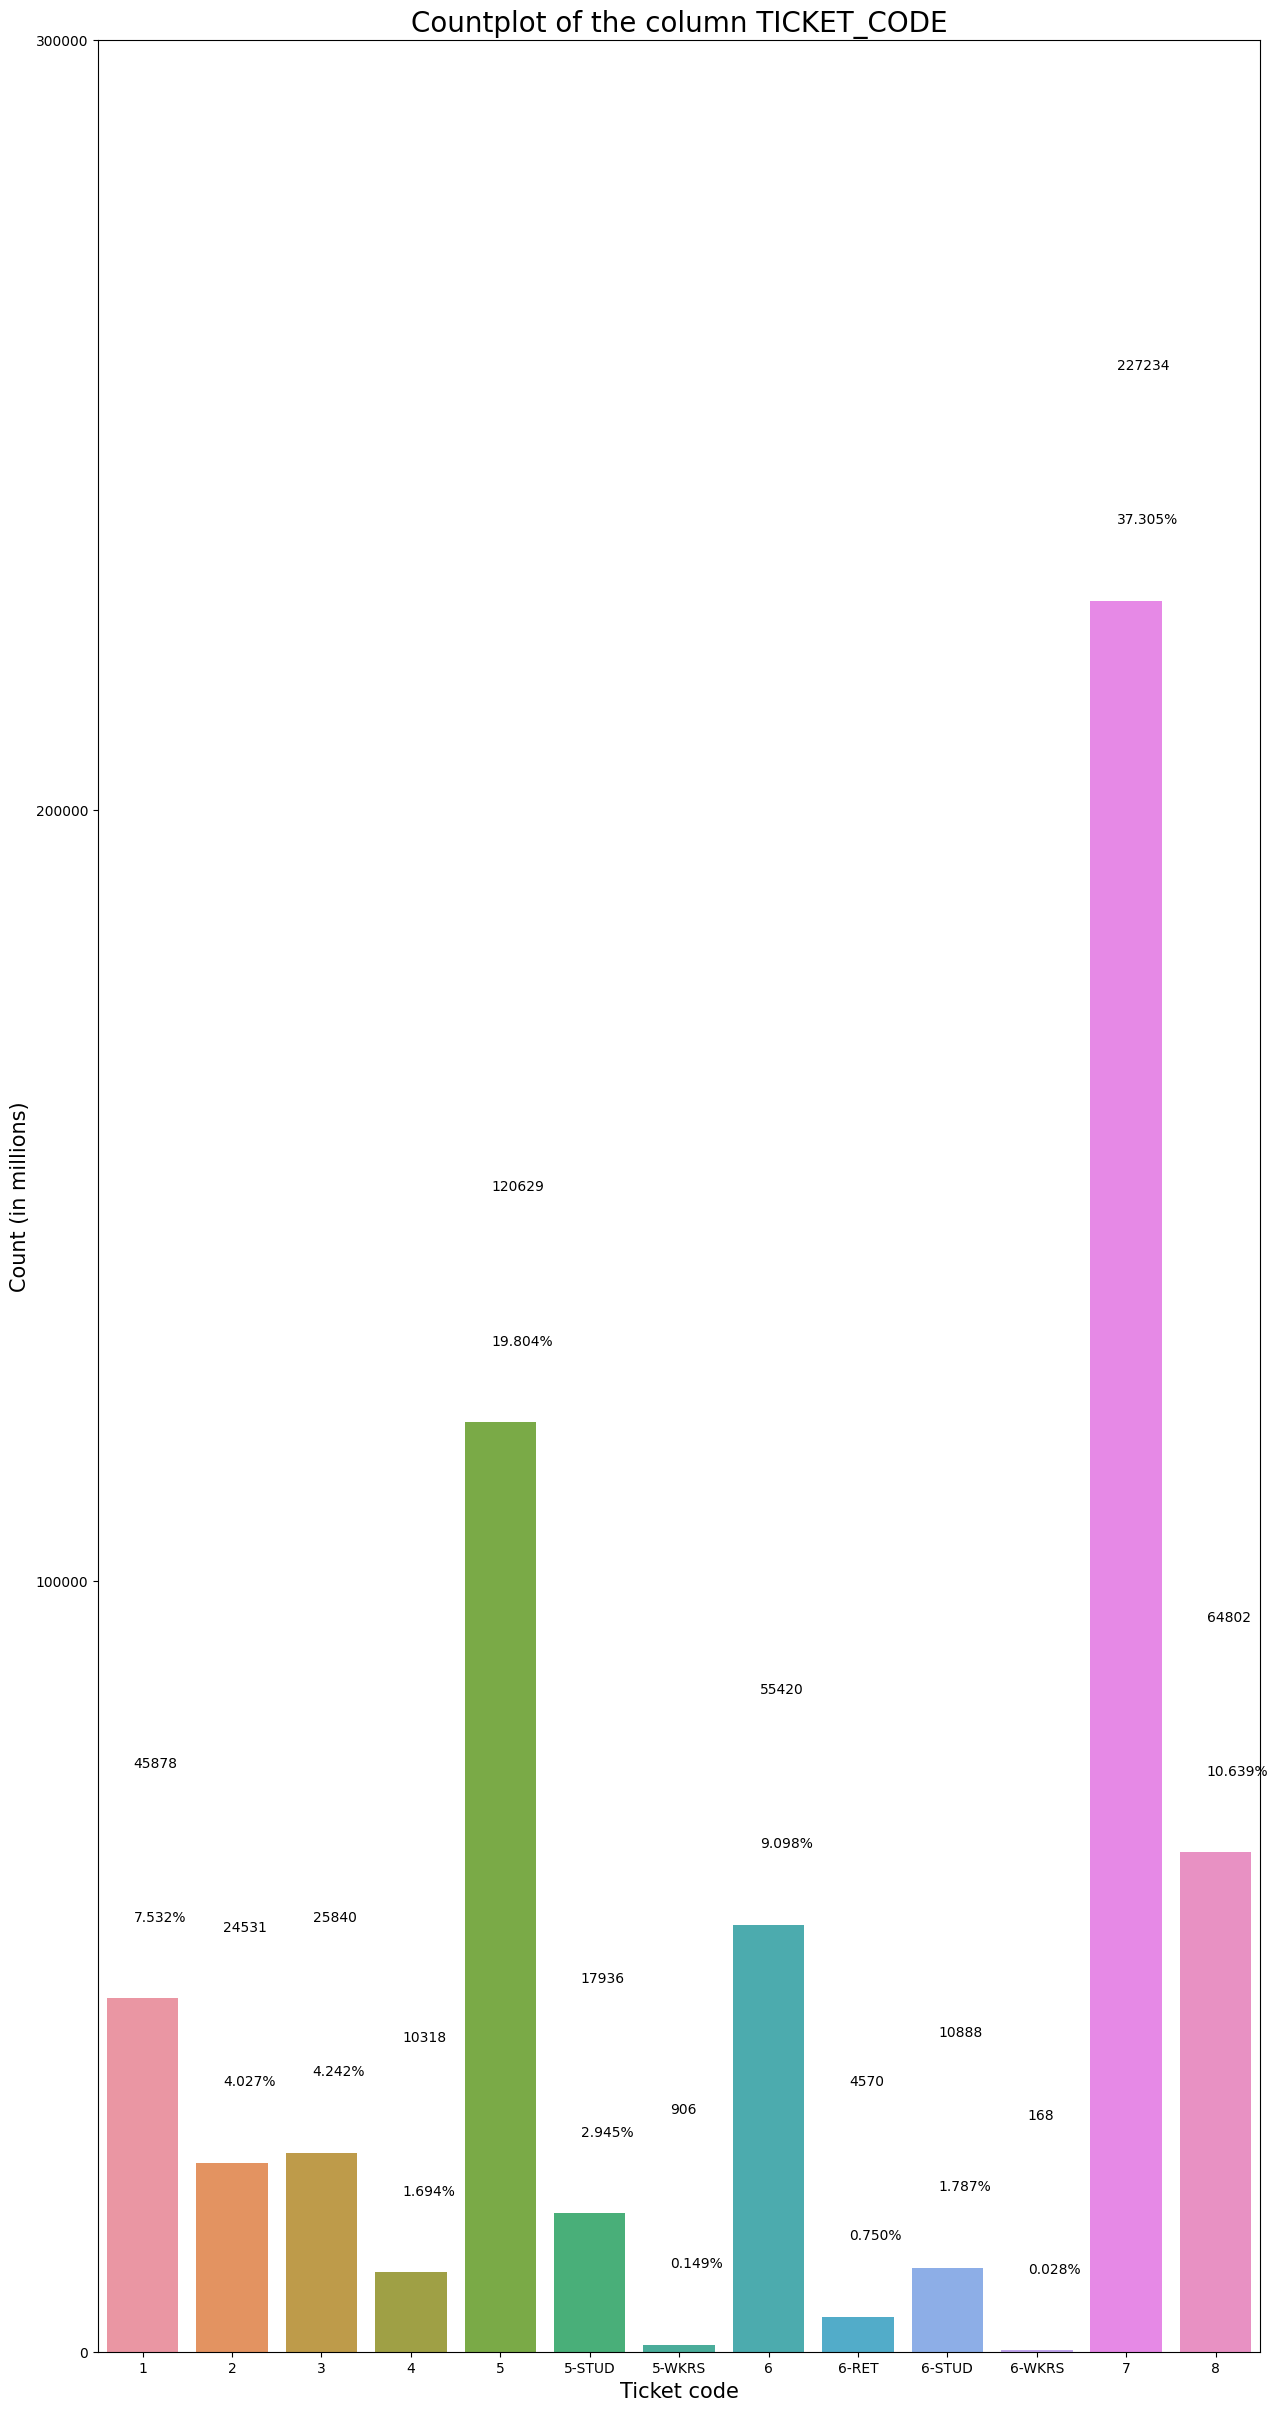

In [248]:
# Countplot of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(15,8))
# Countplot of the column 'TICKET_CODE'
sns.countplot(x='TICKET_CODE', data=df, order=df['TICKET_CODE'].value_counts().sort_index().index)
plt.title('Countplot of the column TICKET_CODE', fontsize=20)
plt.xlabel('Ticket code', fontsize=15)
plt.ylabel('Count (in millions)', fontsize=15)

# Change yticks to have a better visualization
scale = np.arange(0, max(df['TICKET_CODE'].value_counts())+100000, 100000)
plt.yticks(scale)

# Add the percentage of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.3, p.get_height()+10000))

# Add the count of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+30000))

# Add a padding on the top of the plot
plt.subplots_adjust(top=3)

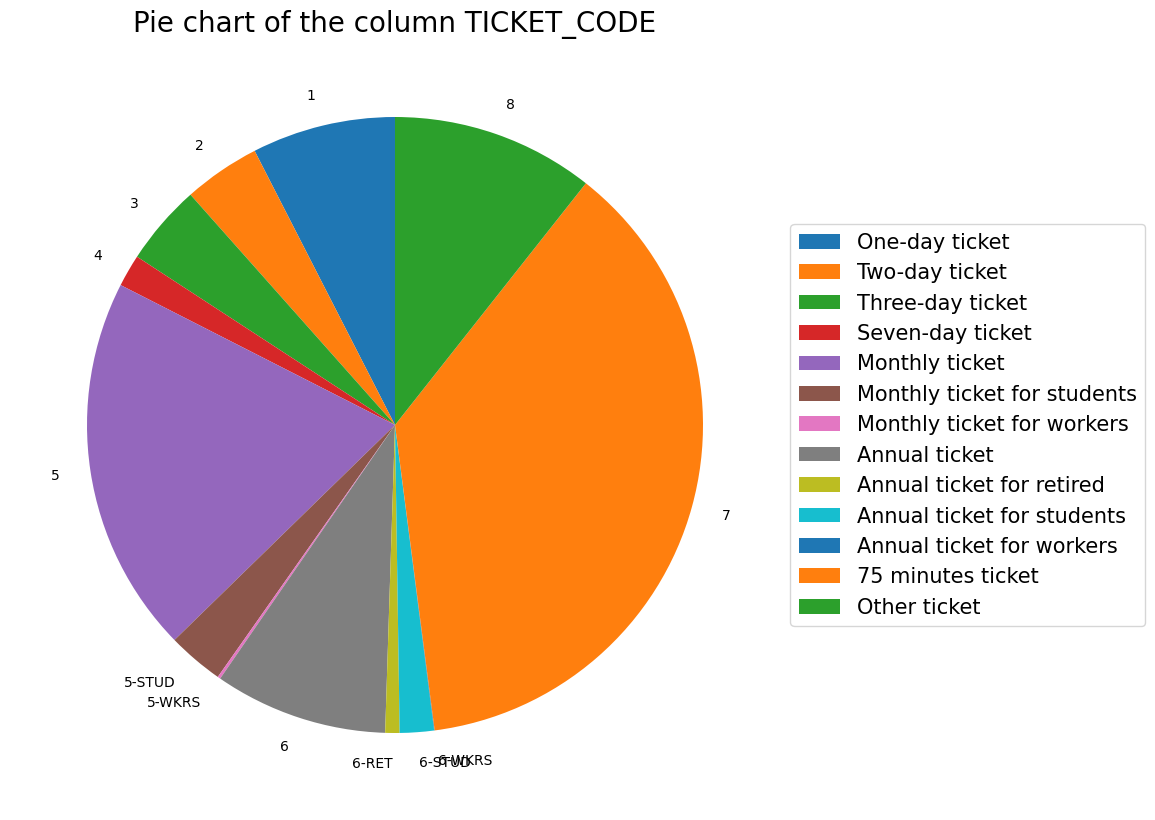

In [249]:
# Plot a pie chart of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(20,10))
df['TICKET_CODE'].value_counts().sort_index().plot.pie(startangle=90)

# Add the name of the ticket profile on the pie chart
plt.legend(labels=df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

plt.title('Pie chart of the column TICKET_CODE', fontsize=20)
plt.ylabel('')
fig.patch.set_facecolor('white')
plt.show()

#### Delete the validation that are with TICKET_CODE = 8 (other tickets) 

In [250]:
shape_before = df.shape[0]

# Delete 8 tickets because they are not useful for the analysis 
df = df[df['TICKET_CODE'] != '8']

# Print the number of rows before and after the deletion of the 8 tickets and the difference
print('The number of rows before the deletion of the 8 tickets is: {}'.format(shape_before))
print('The number of rows after the deletion of the 8 tickets is: {}'.format(df.shape[0]))
print('The difference is: {}'.format(shape_before - df.shape[0]))

# TODO: to de-comment later

The number of rows before the deletion of the 8 tickets is: 609120
The number of rows after the deletion of the 8 tickets is: 544318
The difference is: 64802


## Data Cleaning

### Stops similar

In [251]:
# Print the number of unique values in the column 'DESCRIZIONE' that are the names of the stops
print('The number of unique values in the column DESCRIZIONE is: {}'.format(df['DESCRIZIONE'].nunique()))

The number of unique values in the column DESCRIZIONE is: 696


In [252]:
def get_common_prefix(string_list):
    """
        This function returns the common prefix of a list of strings.
        If there is no common prefix, it returns an empty string.
        :param string_list: list of strings
        :return: string that is the common prefix of the list of strings
    """
    first_prefix = string_list[0].split(" ")[0]
    # Create and empty dictionary
    prefix_dict = {}

    # Iterate over the list of strings
    for string in string_list[1:]:
        # Check if the string starts with the first prefix
        if not string.startswith(first_prefix):
            # If the string does not start with the first prefix, split the string and take the first word
            first_prefix = string.split(" ")[0]
            if string.startswith(first_prefix):
                # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
                prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
        else:
            # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
            prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
    return prefix_dict

In [253]:
# To avoid problem regarding the letters in uppercase and lowercase, convert all the letters in uppercase
df['DESCRIZIONE'] = df['DESCRIZIONE'].str.upper()

In [254]:
# Use the function get_common_prefix to find the common prefix of the strings in the column 'DESCRIZIONE' and print the result

# Crete a string list with the unique values of the column 'DESCRIZIONE'
string_list = df['DESCRIZIONE'].unique().tolist()

dict_prefix = get_common_prefix(string_list)
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

# Print the number of keys in the dictionary
print('The number of keys in the dictionary is: {}'.format(len(dict_prefix.keys())))

ZATTERE: ['ZATTERE "B"', 'ZATTERE "A"']
S.: ['S. TOMA\' "B"', 'S. MARCO-SAN', 'S. MARCUOLA-', 'S. STAE', 'S. MARCO VAL', 'S.ELENA-STAD', 'S. MARIA DEL', 'S. SILVESTRO', 'S. ANGELO', 'S. ALVISE', 'S. GIORGIO', 'S. PIETRO DI', 'S. BASILIO', 'S. MARTA', 'S. SERVOLO', 'S. ERASMO PU', 'S. ERASMO CA', 'S. ERASMO CH', 'S. SAMUELE', 'S. MARCO (GI', 'S. LAZZARO', 'S. TOMA\' "A"', 'S. MARCO GIA']
VENEZIA: ['VENEZIA CORS', 'VENEZIA', 'VENEZIA PIAZ', 'VENEZIA RAMP']
P.LE: ['P.LE ROMA "G', 'P.LE ROMA "E', 'P.LE ROMA "A', 'P.LE ROMA "C', 'P.LE ROMA "D', 'P.LE ROMA "B', 'P.LE ROMA "F']
FERROVIA: ['FERROVIA "B"', 'FERROVIA "D"', 'FERROVIA "E"', 'FERROVIA PIO', 'FERROVIA "A"', 'FERROVIA "C"']
SAN: ['SAN MARCO CA', 'SAN MARCO SA', 'SAN MARCO-SA', "SANT'ANTONIO", 'SAN MARCO MO', "SAN DONA' MA", "SAN DONA' CE", "SAN DONA' RI", "SAN DONA' PI", 'SAN MARCO BO', "SAN DONA' PA", 'SAN MARCO MA', 'SAN LIBERALE', "SAN DONA' VA", "SAN DONA' FA", 'SAN MARCO FO', 'SANTA MARGHE', "SAN DONA' PE", 'SANTA MARIA ', 'SAN 

#### Update some keys in the dictionary

In [255]:
# Rename the key 'P.le' with 'P.le Roma'
dict_prefix['P.LE ROMA'] = dict_prefix.pop('P.LE')
# Rename the key 'F.TE' with 'F.TE NOVE'
dict_prefix['F.TE NOVE'] = dict_prefix.pop('F.TE')

In [256]:
# Print the values of the dictionary with the keys 'S.' and 'San'
print('The values of the dictionary with the key S. are: {}'.format(dict_prefix['S.']))
print('The values of the dictionary with the key San are: {}'.format(dict_prefix['SAN']))

The values of the dictionary with the key S. are: ['S. TOMA\' "B"', 'S. MARCO-SAN', 'S. MARCUOLA-', 'S. STAE', 'S. MARCO VAL', 'S.ELENA-STAD', 'S. MARIA DEL', 'S. SILVESTRO', 'S. ANGELO', 'S. ALVISE', 'S. GIORGIO', 'S. PIETRO DI', 'S. BASILIO', 'S. MARTA', 'S. SERVOLO', 'S. ERASMO PU', 'S. ERASMO CA', 'S. ERASMO CH', 'S. SAMUELE', 'S. MARCO (GI', 'S. LAZZARO', 'S. TOMA\' "A"', 'S. MARCO GIA']
The values of the dictionary with the key San are: ['SAN MARCO CA', 'SAN MARCO SA', 'SAN MARCO-SA', "SANT'ANTONIO", 'SAN MARCO MO', "SAN DONA' MA", "SAN DONA' CE", "SAN DONA' RI", "SAN DONA' PI", 'SAN MARCO BO', "SAN DONA' PA", 'SAN MARCO MA', 'SAN LIBERALE', "SAN DONA' VA", "SAN DONA' FA", 'SAN MARCO FO', 'SANTA MARGHE', "SAN DONA' PE", 'SANTA MARIA ', 'SAN MARCO MU', "SAN NICOLO' ", "SAN NICOLO'", 'SAN ROCCO BR', 'SANSOVINO VE', 'SAN PIETRO B', 'SANPIETRO CA', 'SAN PIETRO P', 'SANT´ANNA S', 'SAN PIETRO C']


##### S.Erasmo

In [257]:
# Create a new key in the dictionary with the key S.ERASMO; insert as value the list of strings that have the prefix 'S.ERASMO'
dict_prefix['S.ERASMO'] = [string for string in dict_prefix['S.'] if string.startswith('S.ERASMO')]

# Add the value 'S. Erasmo Pu' originally in the key 'San' to the key 'S.ERASMO'
dict_prefix['S.ERASMO'].append('S. ERASMO PU')

# Remove the strings that have the prefix 'S.ERASMO' from the keys 'S.' and 'San'
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S.ERASMO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. ERASMO PU')]

# Print the values of the dictionary with the key 'S.ERASMO'
print('The values of the dictionary with the key S.ERASMO are: {}'.format(dict_prefix['S.ERASMO']))

The values of the dictionary with the key S.ERASMO are: ['S. ERASMO PU']


##### San Marco

In [258]:
# Create a new key in the dictionary with the key 'San Marco'; insert as value the list of strings that have the prefix 'San Marco'
dict_prefix['SAN MARCO'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN MARCO')]


# Add the value S. MARCO (Gi', 'S. Pietro in Gu') originally in the key 'S.' to the key 'San Marco'
dict_prefix['SAN MARCO'].append('S. MARCO (GI')

# Remove the strings that have the prefix 'San Marco' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN MARCO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. MARCO (GI')]

# Print the values of the dictionary with the key 'San Marco'
print('The values of the dictionary with the key San Marco are: {}'.format(dict_prefix['SAN MARCO']))

The values of the dictionary with the key San Marco are: ['SAN MARCO CA', 'SAN MARCO SA', 'SAN MARCO-SA', 'SAN MARCO MO', 'SAN MARCO BO', 'SAN MARCO MA', 'SAN MARCO FO', 'SAN MARCO MU', 'S. MARCO (GI']


##### San Dona'

In [259]:
# Create a new key in the dictionary with the key 'San Dona'; insert as value the list of strings that have the prefix 'San Dona'
dict_prefix['SAN DONA'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN DONA')]

# Remove the strings that have the prefix 'San Dona' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN DONA')]

# Print the values of the dictionary with the key 'San Dona'
print('The values of the dictionary with the key San Dona are: {}'.format(dict_prefix['SAN DONA']))

The values of the dictionary with the key San Dona are: ["SAN DONA' MA", "SAN DONA' CE", "SAN DONA' RI", "SAN DONA' PI", "SAN DONA' PA", "SAN DONA' VA", "SAN DONA' FA", "SAN DONA' PE"]


#### San Pietro

In [260]:
# Create a new key in the dictionary with the key 'San Pietro'; insert as value the list of strings that have the word 'Pietro' in the string
dict_prefix['SAN PIETRO'] = [string for string in dict_prefix['SAN'] if 'PIETRO' in string] + [string for string in dict_prefix['S.'] if 'PIETRO' in string]

# Remove the strings that have the word 'Pietro' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if 'PIETRO' not in string]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if 'PIETRO' not in string]

# Print the values of the dictionary with the key 'San Pietro'
print('The values of the dictionary with the key San Pietro are: {}'.format(dict_prefix['SAN PIETRO']))

The values of the dictionary with the key San Pietro are: ['SAN PIETRO B', 'SANPIETRO CA', 'SAN PIETRO P', 'SAN PIETRO C', 'S. PIETRO DI']


#### Ca' Rossa

In [261]:
# Create a new key in the dictionary with the key 'Ca' Rossa'; insert as value the list of strings that have the word 'Ca' Rossa' in the string
dict_prefix['CA\' ROSSA'] = [string for string in dict_prefix['CA\''] if 'CA' in string and 'ROSSA' in string]

# Remove the strings that have the word 'Ca' Rossa' from the keys 'Ca''
dict_prefix['CA\''] = [string for string in dict_prefix['CA\''] if 'CA' not in string or 'ROSSA' not in string]

# Print the values of the dictionary with the key 'Ca Rossa'
print('The values of the dictionary with the key Ca\' Rossa are: {}'.format(dict_prefix['CA\' ROSSA']))

The values of the dictionary with the key Ca' Rossa are: ["CA' ROSSA VO", "CA' ROSSA SE", "CA' ROSSA BI", "CA' ROSSA OB"]


##### Manage the remaining values in the keys 'S.' and 'San' and others

In [262]:
# Manage the remaining values in the keys 'S.', 'San', 'Santa', 'Sant'', 'Ca'', 'Piazza', 'Piazzale', 'Stazione', 'Treviso, 'Trento', 'Incr.'
# Create a new key for each value in the keys as above and assign the value as value of the new key
# Remove the values from the keys as above

if 'S.' in dict_prefix:
    for value in dict_prefix['S.']:
        dict_prefix[value] = [value]
    dict_prefix.pop('S.')

if 'SAN' in dict_prefix:
    for value in dict_prefix['SAN']:
        dict_prefix[value] = [value]
    dict_prefix.pop('SAN')

if 'SANTA' in dict_prefix:
    for value in dict_prefix['SANTA']:
        dict_prefix[value] = [value]
    dict_prefix.pop('SANTA')

if 'SANT\'' in dict_prefix:
    for value in dict_prefix['SANT\'']:
        dict_prefix[value] = [value]
    dict_prefix.pop('SANT\'')

if 'CA\'' in dict_prefix:
    for value in dict_prefix['CA\'']:
        dict_prefix[value] = [value]
    dict_prefix.pop('CA\'')

if 'PIAZZA' in dict_prefix:
    for value in dict_prefix['PIAZZA']:
        dict_prefix[value] = [value]
    dict_prefix.pop('PIAZZA')

if 'PIAZZALE' in dict_prefix:
    for value in dict_prefix['PIAZZALE']:
        dict_prefix[value] = [value]
    dict_prefix.pop('PIAZZALE')

if 'VIA' in dict_prefix:
    for value in dict_prefix['VIA']:
        dict_prefix[value] = [value]
    dict_prefix.pop('VIA')

if 'STAZIONE' in dict_prefix:
    for value in dict_prefix['STAZIONE']:
        dict_prefix[value] = [value]
    dict_prefix.pop('STAZIONE')

if 'TREVISO' in dict_prefix:
    for value in dict_prefix['TREVISO']:
        dict_prefix[value] = [value]
    dict_prefix.pop('TREVISO')

if 'TRENTO' in dict_prefix:
    for value in dict_prefix['TRENTO']:
        dict_prefix[value] = [value]
    dict_prefix.pop('TRENTO')

if 'INCR.' in dict_prefix:
    for value in dict_prefix['INCR.']:
        dict_prefix[value] = [value]
    dict_prefix.pop('INCR.')

if 'DE' in dict_prefix:
    for value in dict_prefix['DE']:
        dict_prefix[value] = [value]
    dict_prefix.pop('DE')

#### Treviso and Trento

In [263]:
# Remove the values Treviso, Trento, Trezzo and Treporti from the key 'Tre'
dict_prefix['TRE'] = [string for string in dict_prefix['TRE'] if 'TREVISO' not in string and 'TRENTO' not in string and 'TREZZO' not in string and 'TREPORTI' not in string]

# Print the values of the dictionary with the key 'Tre'
print('The values of the dictionary with the key Tre are: {}'.format(dict_prefix['TRE']))

# TODO: Correct the values of the keys 'Treviso' and 'Trento' with the correct values

The values of the dictionary with the key Tre are: ['TRE ARCHI']


#### Keys with only an item

In [264]:
# If a key as only one value, then rename the key with the value
# Use copy() to avoid RuntimeError: dictionary changed size during iteration
for key, value in dict_prefix.copy().items():
    if len(value) == 1:
        dict_prefix[value[0]] = dict_prefix.pop(key)

##### Finally, the update dictionary is

In [265]:
# Print the dictionary in the new format
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

ZATTERE: ['ZATTERE "B"', 'ZATTERE "A"']
VENEZIA: ['VENEZIA CORS', 'VENEZIA', 'VENEZIA PIAZ', 'VENEZIA RAMP']
FERROVIA: ['FERROVIA "B"', 'FERROVIA "D"', 'FERROVIA "E"', 'FERROVIA PIO', 'FERROVIA "A"', 'FERROVIA "C"']
TRONCHETTO: ['TRONCHETTO F', 'TRONCHETTO "', 'TRONCHETTO M', 'TRONCHETTO T']
RIALTO: ['RIALTO "C"', 'RIALTO MERCA', 'RIALTO "D"', 'RIALTO "B"', 'RIALTO "A"']
GIARDINI: ['GIARDINI BIE', 'GIARDINI "B"', 'GIARDINI "A"']
ALTINIA: ["ALTINIA CA' ", 'ALTINIA MUNI', 'ALTINIA INDR', 'ALTINIA FAVA', 'ALTINIA SAN ', 'ALTINIA BERI', 'ALTINIA 181', 'ALTINIA FORT']
MESTRE: ['MESTRE RAMPA', 'MESTRE CENTR', 'MESTRE VIA M', 'MESTRE VIA H', 'MESTRE VIA T', 'MESTRE STAZI', 'MESTRE VIA P', 'MESTRE VIA A', 'MESTRE PIAZZ']
CHIOGGIA: ['CHIOGGIA', 'CHIOGGIA VIA', 'CHIOGGIA SAN', 'CHIOGGIA CAM', 'CHIOGGIA STA', 'CHIOGGIA BER', 'CHIOGGIA ISO', 'CHIOGGIA RID', 'CHIOGGIA PAR', 'CHIOGGIA VAL', 'CHIOGGIA NEN']
LIDO: ['LIDO S.M.E. ', 'LIDO S. NICO']
ARSENALE: ['ARSENALE "B"', 'ARSENALE "A"']
GALLO: ['GAL

In [266]:
# Export the dictionary in a json file
name_file = 'dict_prefix_' + file_name.split('.')[0] + '.json'
with open('data/dictionaries/' + name_file, 'w') as fp:
    json.dump(dict_prefix, fp)

### Useless stamps

In [267]:
# TODO: #1 Remove useless rows that have a minimum temporal gap for the same serial and fermata
# DE-COMMENT THE FOLLOWING LINES OF CODE

In [268]:
# Find the serial with the hightest number of validations, and the same for each ticket profile, save the results in a dictionary
dict_serial = {}
for ticket in df['TICKET_CODE'].unique():
    dict_serial[ticket] = df[df['TICKET_CODE'] == ticket]['SERIALE'].value_counts().index[0]

# Print the serial with the hightest number of validations, and the same for each ticket profile
for ticket in df['TICKET_CODE'].unique():
  print('The serial with the hightest number of validations for the ticket profile {} is: {}'.format(ticket, dict_serial[ticket]))

The serial with the hightest number of validations for the ticket profile 7 is: -2821775794
The serial with the hightest number of validations for the ticket profile 5-STUD is: -3619112366
The serial with the hightest number of validations for the ticket profile 6-STUD is: -3613105495
The serial with the hightest number of validations for the ticket profile 5 is: -2821768344
The serial with the hightest number of validations for the ticket profile 6 is: -2855011795
The serial with the hightest number of validations for the ticket profile 1 is: 36369814781499652
The serial with the hightest number of validations for the ticket profile 2 is: 40551647001685764
The serial with the hightest number of validations for the ticket profile 3 is: 41960767511353348
The serial with the hightest number of validations for the ticket profile 4 is: 40552758050967812
The serial with the hightest number of validations for the ticket profile 6-RET is: -3613089913
The serial with the hightest number of val

In [269]:
# Group by the serial and the fermata 
# df = df.groupby(['SERIALE', 'FERMATA']).apply(lambda x: x.sort_values(by='DATA_VALIDAZIONE', ascending=True))

# Print the first 5 rows of the df
# df.head()
# DO NOT DE-COMMENT THIS CELL

In [270]:
# Reset the index of the df and drop the old index in order to have a new index starting from 0 to the number of rows
# It is necessary to have a new index because the groupby function has created a multi-index
df.reset_index(drop=True, inplace=True)

In [271]:
# Create a new column 'MIN_TEMPORAL_GAP' that contains the minimum temporal gap between two validations for the same serial and fermata in minutes
df = df.groupby(['SERIALE','DATA', 'DESCRIZIONE']).apply(lambda x: x.assign(MIN_TEMPORAL_GAP = x['DATA_VALIDAZIONE'].diff().dt.total_seconds()/60))

In [272]:
df.head(20)

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO,MIN_TEMPORAL_GAP
0,2023-01-13,00:00:00,2023-01-13 00:00:00,40834866809772548,162,STAZIONE MES,12101,7,BIGL.AUT.75'MESTRE/LIDO-TSC,NaN
1,2023-01-13,00:00:00,2023-01-13 00:00:00,-3604990320,5049,"ZATTERE ""B""",23301,5-STUD,MENS.STUDENTE RETE UNICA,NaN
2,2023-01-13,00:00:00,2023-01-13 00:00:00,-2824230951,5043,"S. TOMA' ""B""",23303,6-STUD,ABB STUD. RETEUNICA 12 MESI,NaN
3,2023-01-13,00:00:00,2023-01-13 00:00:00,40552750134805252,5013,S. MARCO-SAN,11101,7,"75'-TPL 8,64-COMVE0,86",NaN
4,2023-01-13,00:01:00,2023-01-13 00:01:00,-3604964420,6084,VENEZIA CORS,11209,7,BIGL RETE UNICA 75',NaN
5,2023-01-13,00:01:00,2023-01-13 00:01:00,-2855032233,6084,VENEZIA CORS,11209,7,BIGL RETE UNICA 75',NaN
6,2023-01-13,00:01:00,2023-01-13 00:01:00,-3604965107,5031,"P.LE ROMA ""G",23301,5-STUD,MENS.STUDENTE RETE UNICA,NaN
7,2023-01-13,00:01:00,2023-01-13 00:01:00,-3613059169,5032,"FERROVIA ""B""",23101,5,MENSILE ORDINARIO RETE UNICA,NaN
8,2023-01-13,00:01:00,2023-01-13 00:01:00,-3604913072,6057,SAN MARCO CA,11209,7,BIGL RETE UNICA 75',NaN
9,2023-01-13,00:01:00,2023-01-13 00:01:00,65694113023229189,1392,LIBERTA' SAN,12101,7,BIGL.AUT.75'MESTRE/LIDO-TSC,NaN


In [273]:
df.tail(20)

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO,MIN_TEMPORAL_GAP
544298,2023-01-20,18:55:00,2023-01-20 18:55:00,-2854973203,5001,LIDO S.M.E.,23102,6,ANNUALE ORDINARIO RETE UNICA,0.0
544299,2023-01-20,18:55:00,2023-01-20 18:55:00,-3619123971,384,MESTRE CENTR,11209,7,BIGL RETE UNICA 75',0.0
544300,2023-01-20,18:55:00,2023-01-20 18:55:00,-2855007716,5013,S. MARCO-SAN,20003,5,MENSILE ORDINARIO ISOLE,0.0
544301,2023-01-20,18:55:00,2023-01-20 18:55:00,41679520841826308,5013,S. MARCO-SAN,11101,7,"75'-TPL 8,64-COMVE0,86",0.0
544302,2023-01-20,18:55:00,2023-01-20 18:55:00,-2821805154,5049,"ZATTERE ""B""",11209,7,BIGL RETE UNICA 75',0.0
544303,2023-01-20,18:55:00,2023-01-20 18:55:00,-3604931654,5039,"RIALTO ""C""",23102,6,ANNUALE ORDINARIO RETE UNICA,0.0
544304,2023-01-20,18:55:00,2023-01-20 18:55:00,40553620935333380,622,BOTTENIGO PI,12101,7,BIGL.AUT.75'MESTRE/LIDO-TSC,0.0
544305,2023-01-20,18:55:00,2023-01-20 18:55:00,65694110860671749,622,BOTTENIGO PI,12101,7,BIGL.AUT.75'MESTRE/LIDO-TSC,0.0
544306,2023-01-20,18:55:00,2023-01-20 18:55:00,-3604952617,5151,"BURANO ""A""",23102,6,ANNUALE ORDINARIO RETE UNICA,0.0
544307,2023-01-20,18:55:00,2023-01-20 18:55:00,-3613080651,5058,MADONNA DELL,11209,7,BIGL RETE UNICA 75',0.0


In [274]:
df['MIN_TEMPORAL_GAP'].value_counts()

 0.0       51364
 1.0        2264
 2.0        1582
 3.0         958
 4.0         659
 5.0         533
 6.0         388
 7.0         299
 8.0         216
 10.0        169
-1.0         160
 9.0         156
 11.0        145
-2.0         132
 13.0        114
 12.0        110
-3.0          96
-4.0          62
 14.0         60
 21.0         58
 15.0         56
 16.0         56
 22.0         53
-5.0          53
 25.0         50
 23.0         50
 30.0         49
 17.0         49
 201.0        48
 20.0         46
 240.0        44
 357.0        42
 195.0        42
 24.0         41
 420.0        41
-6.0          41
 419.0        40
 374.0        39
 359.0        39
 418.0        39
 304.0        38
 210.0        38
 411.0        38
 18.0         38
 348.0        38
 382.0        38
 302.0        38
 288.0        37
 29.0         37
 161.0        37
 478.0        37
 243.0        36
 350.0        36
 261.0        36
 421.0        36
 312.0        36
 385.0        36
 342.0        36
 19.0         

In [275]:
# How many rows have a minimum temporal gap equal to NaN?
df[df['MIN_TEMPORAL_GAP'].isna()].shape[0]

469363

In [276]:
# Cleaning operation: remove the rows using the minimum temporal gap

# Find a reasonable delta of MIN_TEMPORAL_GAP to remove the rows that have a minimum temporal gap for the same serial and fermata less than this delta
# Print the minimum value of the column MIN_TEMPORAL_GAP
print('The minimum value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].min()))

# Print the maximum value of the column MIN_TEMPORAL_GAP
print('The maximum value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].max()))

# Print the mean value of the column MIN_TEMPORAL_GAP
print('The mean value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].mean()))

# Print the median value of the column MIN_TEMPORAL_GAP
print('The median value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].median()))

# Print the standard deviation of the column MIN_TEMPORAL_GAP
print('The standard deviation of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].std()))

# Print the 0.05th percentile of the column MIN_TEMPORAL_GAP
print('The 0.05th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.05)))

# Print the 0.10th percentile of the column MIN_TEMPORAL_GAP
print('The 0.10th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.10)))

# Print the 25th percentile of the column MIN_TEMPORAL_GAP
print('The 25th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.25)))

# Print the 75th percentile of the column MIN_TEMPORAL_GAP
print('The 75th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.75)))

# Print the 90th percentile of the column MIN_TEMPORAL_GAP
print('The 90th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.90)))

# Print the 95th percentile of the column MIN_TEMPORAL_GAP
print('The 95th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.95)))

# Print the 99th percentile of the column MIN_TEMPORAL_GAP
print('The 99th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.99)))

# Print the 99.9th percentile of the column MIN_TEMPORAL_GAP
print('The 99.9th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.999)))

# Decide the delta of MIN_TEMPORAL_GAP using the 25th percentile of the column MIN_TEMPORAL_G
delta = df['MIN_TEMPORAL_GAP'].quantile(0.1)
if delta == 0:
    delta = df['MIN_TEMPORAL_GAP'].quantile(0.25)
if delta == 0:
    delta = df['MIN_TEMPORAL_GAP'].median()
print('The delta of MIN_TEMPORAL_GAP is: {}'.format(delta))

The minimum value of the column MIN_TEMPORAL_GAP is: -560.0
The maximum value of the column MIN_TEMPORAL_GAP is: 1432.0
The mean value of the column MIN_TEMPORAL_GAP is: 59.465626042292044
The median value of the column MIN_TEMPORAL_GAP is: 0.0
The standard deviation of the column MIN_TEMPORAL_GAP is: 156.11538129431597
The 0.05th percentile of the column MIN_TEMPORAL_GAP is: 0.0
The 0.10th percentile of the column MIN_TEMPORAL_GAP is: 0.0
The 25th percentile of the column MIN_TEMPORAL_GAP is: 0.0
The 75th percentile of the column MIN_TEMPORAL_GAP is: 2.0
The 90th percentile of the column MIN_TEMPORAL_GAP is: 308.0
The 95th percentile of the column MIN_TEMPORAL_GAP is: 447.0
The 99th percentile of the column MIN_TEMPORAL_GAP is: 630.4600000000064
The 99.9th percentile of the column MIN_TEMPORAL_GAP is: 925.0460000000021
The delta of MIN_TEMPORAL_GAP is: 0.0


In [277]:
# Cleaning operation: remove the rows using the minimum temporal gap

# Save the number of rows before the cleaning operation
shape_before = df.shape[0]

# Delete the rows that have a minimum temporal gap for the same serial and fermata more than the delta calculated before.
# Do not remove the rows with NaN values because they are the first validations of the day of a specific serial and fermata usefull for the analysis
df = df[(df['MIN_TEMPORAL_GAP'] > delta) | (df['MIN_TEMPORAL_GAP'].isna())]

# Print the number of rows before and after the cleaning operation and the difference
print('The number of rows before the cleaning operation is: {}'.format(shape_before))
print('The number of rows after the cleaning operation is: {}'.format(df.shape[0]))
print('The difference is: {}'.format(shape_before - df.shape[0]))
# Calculate the percentage of rows that has just been deleted
print('The percentage of rows that has just been deleted is: {}%'.format(round((shape_before - df.shape[0])/shape_before*100, 2)))

The number of rows before the cleaning operation is: 544318
The number of rows after the cleaning operation is: 491401
The difference is: 52917
The percentage of rows that has just been deleted is: 9.72%


In [278]:
# Delete the column MIN_TEMPORAL_GAP because it is not useful anymore
df.drop('MIN_TEMPORAL_GAP', axis=1, inplace=True)

In [279]:
# Create a new dataframe, copied from the original one
df_new = df.copy() 

# Update the column 'DESCRIZIONE' of the new df with the new values of the dictionary: 
# the value that are present in the dataframe are the values of the dictionary; you have to sobstitute with the key of the dictionary
for key, value in dict_prefix.items():
    df_new['DESCRIZIONE'] = df_new['DESCRIZIONE'].replace(value, key)


# Print the head of the new dataframe
print(df_new.head())

# Export the new dataframe in a txt file
# The name of the file is dataset_cleaned followed by the name (file_name variable) of the file that has been cleaned with txt extension
name_file = 'dataset_cleaned_' + file_name.split('.')[0] + '.txt'
df_new.to_csv('data/processed/' + name_file, sep='\t', index=False)

print('The script has finished')

        DATA       ORA    DATA_VALIDAZIONE            SERIALE  FERMATA  \
0 2023-01-13  00:00:00 2023-01-13 00:00:00  40834866809772548      162   
1 2023-01-13  00:00:00 2023-01-13 00:00:00        -3604990320     5049   
2 2023-01-13  00:00:00 2023-01-13 00:00:00        -2824230951     5043   
3 2023-01-13  00:00:00 2023-01-13 00:00:00  40552750134805252     5013   
4 2023-01-13  00:01:00 2023-01-13 00:01:00        -3604964420     6084   

    DESCRIZIONE  TITOLO TICKET_CODE            DESCRIZIONE_TITOLO  
0  STAZIONE MES   12101           7   BIGL.AUT.75'MESTRE/LIDO-TSC  
1       ZATTERE   23301      5-STUD      MENS.STUDENTE RETE UNICA  
2  S. TOMA' "B"   23303      6-STUD  ABB STUD. RETEUNICA 12 MESI   
3  S. MARCO-SAN   11101           7        75'-TPL 8,64-COMVE0,86  
4       VENEZIA   11209           7           BIGL RETE UNICA 75'  
The script has finished
